In [9]:
import pandas as pd
import numpy as np

In [10]:
import pandas as pd
from pandas import read_excel
my_sheet_name = 'Sheet1' 
data = read_excel("gool.xlsx", sheet_name = my_sheet_name)
data.head(5)

,سال شمسی,ماه شمسی,روز شمسی,میانگین دمای خشک سلسیوس,دمای حداکثر مطلق سلسیوس,دمای حداقل مطلق سلسیوس,میانگین رطوبت,بیشینه رطوبت,کمترین رطوبت
0,1395,1,1,23.1750,26.2,20.7,68.500,60,79
1,1395,1,2,22.9000,27.5,14.8,71.250,62,82
2,1395,1,3,21.4000,23.4,21.4,81.875,74,87
3,1395,1,4,22.5000,25.7,18.2,83.625,76,94
4,1395,1,5,22.6125,26.5,19.0,65.875,59,78


In [11]:
data.columns=['sal','mah','roz','damkh','maxdama','mindama','avgrtob','maxr','minrto']

In [12]:
data.head()

,sal,mah,roz,damkh,maxdama,mindama,avgrtob,maxr,minrto
0,1395,1,1,23.1750,26.2,20.7,68.500,60,79
1,1395,1,2,22.9000,27.5,14.8,71.250,62,82
2,1395,1,3,21.4000,23.4,21.4,81.875,74,87
3,1395,1,4,22.5000,25.7,18.2,83.625,76,94
4,1395,1,5,22.6125,26.5,19.0,65.875,59,78


In [13]:
data_mood_delta=data[ 'sal'].value_counts()
data_mood_delta

1395    366
1396    365
1397    255
Name: sal, dtype: int64

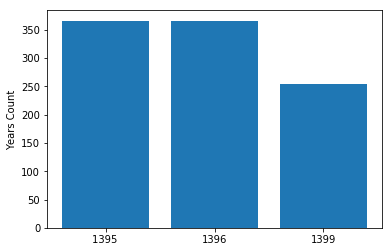

In [14]:
import matplotlib.pyplot as plt
index=[i for i in range(3) ]
plt.bar(index,data_mood_delta)
plt.xticks(index,['1395 ','1396','1399'])
plt.ylabel('Years Count')
plt.show()

In [15]:
data.head(2)

,sal,mah,roz,damkh,maxdama,mindama,avgrtob,maxr,minrto
0,1395,1,1,23.175,26.2,20.7,68.50,60,79
1,1395,1,2,22.900,27.5,14.8,71.25,62,82


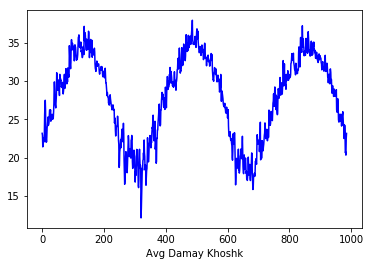

In [16]:
index=[i for i in data['damkh'] ]
plt.plot(index,'b')
plt.xlabel('Avg Damay Khoshk')
plt.show()

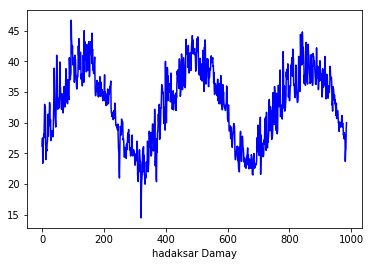

In [17]:
index=[i for i in data['maxdama'] ]
#print(index)
plt.plot(index,'b')
plt.xlabel('hadaksar Damay')
plt.show()

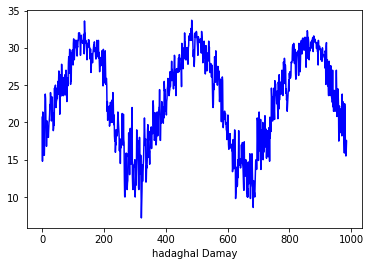

In [18]:
index=[i for i in data['mindama'] ]
plt.plot(index,'b')
plt.xlabel('hadaghal Damay')
plt.show()

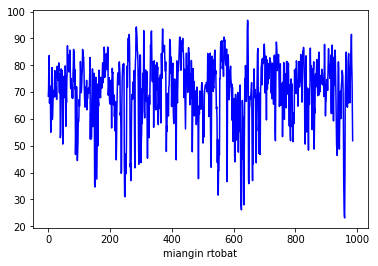

In [19]:
#
index=[i for i in data['avgrtob'] ]
plt.plot(index,'b')
plt.xlabel('miangin rtobat')
plt.show()

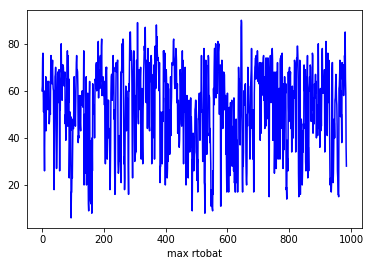

In [20]:
index=[i for i in data['maxr'] ]
plt.plot(index,'b')
plt.xlabel('max rtobat')
plt.show()

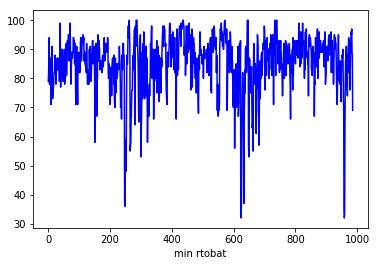

In [21]:
index=[i for i in data['minrto'] ]
plt.plot(index,'b')
plt.xlabel('min rtobat')
plt.show()

In [22]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

/home/raminm/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [67]:
import pandas as pd
from pandas import read_excel
my_sheet_name = 'Sheet1' 
data = read_excel("gool.xlsx", sheet_name = my_sheet_name)
data.columns=['sal','mah','roz','damkh','maxdama','mindama','avgrtob','maxr','minrto']
data.head(5)
df = data
df.head() 

,sal,mah,roz,damkh,maxdama,mindama,avgrtob,maxr,minrto
0,1395,1,1,23.1750,26.2,20.7,68.500,60,79
1,1395,1,2,22.9000,27.5,14.8,71.250,62,82
2,1395,1,3,21.4000,23.4,21.4,81.875,74,87
3,1395,1,4,22.5000,25.7,18.2,83.625,76,94
4,1395,1,5,22.6125,26.5,19.0,65.875,59,78


In [68]:
df = df[['avgrtob']]

In [69]:
dataset = df.values
dataset = dataset.astype('float32')

In [70]:
dataset

array([[68.5    ],
       [71.25   ],
       [81.875  ],
       [83.625  ],
       [65.875  ],
       [69.25   ],
       [72.25   ],
       [66.25   ],
       [55.     ],
       [60.125  ],
       [60.125  ],
       [68.     ],
       [79.125  ],
       [59.75   ],
       [61.     ],
       [66.125  ],
       [69.625  ],
       [70.     ],
       [70.625  ],
       [68.125  ],
       [73.75   ],
       [78.     ],
       [76.5    ],
       [68.375  ],
       [69.     ],
       [69.     ],
       [71.75   ],
       [67.25   ],
       [75.875  ],
       [79.625  ],
       [75.375  ],
       [74.375  ],
       [78.5    ],
       [77.875  ],
       [80.875  ],
       [73.5    ],
       [69.75   ],
       [76.625  ],
       [75.625  ],
       [53.     ],
       [54.375  ],
       [65.625  ],
       [78.625  ],
       [75.     ],
       [78.125  ],
       [75.     ],
       [69.25   ],
       [50.625  ],
       [54.875  ],
       [66.625  ],
       [75.75   ],
       [75.875  ],
       [75.2

In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [72]:
dataset

array([[0.61629885],
       [0.6536503 ],
       [0.79796267],
       [0.8217318 ],
       [0.5806452 ],
       [0.6264856 ],
       [0.66723263],
       [0.58573854],
       [0.4329372 ],
       [0.5025467 ],
       [0.5025467 ],
       [0.6095077 ],
       [0.7606112 ],
       [0.49745333],
       [0.51443124],
       [0.58404076],
       [0.631579  ],
       [0.6366723 ],
       [0.64516133],
       [0.61120546],
       [0.6876061 ],
       [0.74533105],
       [0.7249576 ],
       [0.614601  ],
       [0.62309   ],
       [0.62309   ],
       [0.66044146],
       [0.5993209 ],
       [0.7164686 ],
       [0.7674024 ],
       [0.70967746],
       [0.6960951 ],
       [0.7521223 ],
       [0.7436333 ],
       [0.7843803 ],
       [0.68421054],
       [0.63327676],
       [0.72665536],
       [0.713073  ],
       [0.4057725 ],
       [0.42444825],
       [0.5772496 ],
       [0.75382006],
       [0.704584  ],
       [0.7470288 ],
       [0.704584  ],
       [0.6264856 ],
       [0.373

In [73]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

660 326


In [74]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [76]:
trainX

array([[0.61629885, 0.6536503 , 0.79796267, ..., 0.58573854, 0.4329372 ,
        0.5025467 ],
       [0.6536503 , 0.79796267, 0.8217318 , ..., 0.4329372 , 0.5025467 ,
        0.5025467 ],
       [0.79796267, 0.8217318 , 0.5806452 , ..., 0.5025467 , 0.5025467 ,
        0.6095077 ],
       ...,
       [0.9830221 , 0.80814946, 0.19524616, ..., 0.614601  , 0.6027165 ,
        0.6027165 ],
       [0.80814946, 0.19524616, 0.17317489, ..., 0.6027165 , 0.6027165 ,
        0.62988114],
       [0.19524616, 0.17317489, 0.4295416 , ..., 0.6027165 , 0.62988114,
        0.6536503 ]], dtype=float32)

In [77]:
trainY

array([0.5025467 , 0.6095077 , 0.7606112 , 0.49745333, 0.51443124,
       0.58404076, 0.631579  , 0.6366723 , 0.64516133, 0.61120546,
       0.6876061 , 0.74533105, 0.7249576 , 0.614601  , 0.62309   ,
       0.62309   , 0.66044146, 0.5993209 , 0.7164686 , 0.7674024 ,
       0.70967746, 0.6960951 , 0.7521223 , 0.7436333 , 0.7843803 ,
       0.68421054, 0.63327676, 0.72665536, 0.713073  , 0.4057725 ,
       0.42444825, 0.5772496 , 0.75382006, 0.704584  , 0.7470288 ,
       0.704584  , 0.6264856 , 0.37351447, 0.43123943, 0.59083194,
       0.7147708 , 0.7164686 , 0.7079797 , 0.65704584, 0.60780984,
       0.7691002 , 0.680815  , 0.46349746, 0.62818336, 0.58404076,
       0.6977929 , 0.7317487 , 0.87096775, 0.7504245 , 0.79117155,
       0.8234296 , 0.79796267, 0.73853993, 0.7691002 , 0.8183361 ,
       0.8488965 , 0.7775892 , 0.6655348 , 0.6536503 , 0.704584  ,
       0.6519525 , 0.65534806, 0.60780984, 0.663837  , 0.6044143 ,
       0.72665536, 0.7674024 , 0.85229206, 0.69269955, 0.83870

In [78]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [79]:
trainX.shape

(649, 1, 10)

In [80]:
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
hist=model.fit(trainX, trainY, epochs=200, batch_size=256, verbose=2)

Epoch 1/200
 - 2s - loss: 0.5479 - mean_squared_error: 0.5479 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 115.2849 - cosine_proximity: 0.9908
Epoch 2/200
 - 0s - loss: 0.4924 - mean_squared_error: 0.4924 - mean_absolute_error: 0.6802 - mean_absolute_percentage_error: 108.0576 - cosine_proximity: 0.9106
Epoch 3/200
 - 0s - loss: 0.4407 - mean_squared_error: 0.4407 - mean_absolute_error: 0.6416 - mean_absolute_percentage_error: 101.1252 - cosine_proximity: 0.2450
Epoch 4/200
 - 0s - loss: 0.3918 - mean_squared_error: 0.3918 - mean_absolute_error: 0.6028 - mean_absolute_percentage_error: 94.1088 - cosine_proximity: -8.6133e-01
Epoch 5/200
 - 0s - loss: 0.3465 - mean_squared_error: 0.3465 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 87.4200 - cosine_proximity: -9.9076e-01
Epoch 6/200
 - 0s - loss: 0.3044 - mean_squared_error: 0.3044 - mean_absolute_error: 0.5267 - mean_absolute_percentage_error: 81.0233 - cosine_proximity: -1.0000e+00
Epoch 7/200
 - 0

Epoch 51/200
 - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 30.3411 - cosine_proximity: -1.0000e+00
Epoch 52/200
 - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 30.3127 - cosine_proximity: -1.0000e+00
Epoch 53/200
 - 0s - loss: 0.0264 - mean_squared_error: 0.0264 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 30.2750 - cosine_proximity: -1.0000e+00
Epoch 54/200
 - 0s - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 30.2399 - cosine_proximity: -1.0000e+00
Epoch 55/200
 - 0s - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 30.2013 - cosine_proximity: -1.0000e+00
Epoch 56/200
 - 0s - loss: 0.0262 - mean_squared_error: 0.0262 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 30.1641 - cosine_proximity: -1.0000e+0

 - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 28.5817 - cosine_proximity: -1.0000e+00
Epoch 101/200
 - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 28.5608 - cosine_proximity: -1.0000e+00
Epoch 102/200
 - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 28.5405 - cosine_proximity: -1.0000e+00
Epoch 103/200
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 28.5225 - cosine_proximity: -1.0000e+00
Epoch 104/200
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 28.4918 - cosine_proximity: -1.0000e+00
Epoch 105/200
 - 0s - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 28.4461 - cosine_proximity: -1.0000e+00
Epoch 

Epoch 149/200
 - 0s - loss: 0.0204 - mean_squared_error: 0.0204 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 26.8433 - cosine_proximity: -1.0000e+00
Epoch 150/200
 - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 26.7999 - cosine_proximity: -1.0000e+00
Epoch 151/200
 - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 26.7390 - cosine_proximity: -1.0000e+00
Epoch 152/200
 - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 26.6932 - cosine_proximity: -1.0000e+00
Epoch 153/200
 - 0s - loss: 0.0201 - mean_squared_error: 0.0201 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 26.6484 - cosine_proximity: -1.0000e+00
Epoch 154/200
 - 0s - loss: 0.0201 - mean_squared_error: 0.0201 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 26.6149 - cosine_proximity: -1.0

Epoch 198/200
 - 0s - loss: 0.0178 - mean_squared_error: 0.0178 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 24.9040 - cosine_proximity: -1.0000e+00
Epoch 199/200
 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 24.8824 - cosine_proximity: -1.0000e+00
Epoch 200/200
 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 24.8340 - cosine_proximity: -1.0000e+00


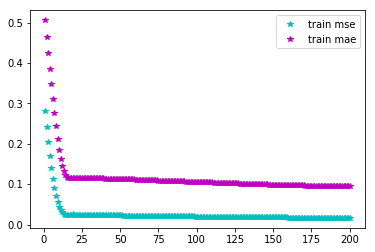

In [48]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
mae = hist.history['mean_absolute_error']
mse= hist.history['mean_squared_error']
epochs = range(1, len(loss) + 1)
plt.plot(epochs ,loss, 'c*', label='train mse')
plt.plot(epochs ,mae, 'm*', label='train mae')
plt.legend()
plt.show()

In [49]:
import math
from sklearn.preprocessing import MinMaxScaler
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.42 RMSE
Test Score: 8.64 RMSE


In [50]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [51]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

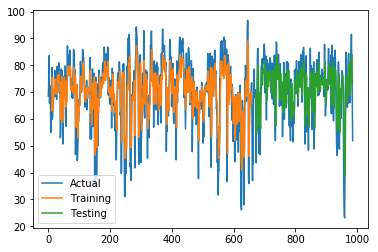

In [52]:
plt.plot(df['avgrtob'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [61]:
trainX.shape

(649, 1, 10)

# model2

In [81]:
from keras.layers import LSTM,GRU
print('Build model...')
model = Sequential()
model.add(GRU(52, return_sequences=False, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(200))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
hist=model.fit(trainX, trainY, epochs=200, batch_size=256, verbose=2)

Build model...
Epoch 1/200
 - 1s - loss: 0.2696 - mean_squared_error: 0.2696 - mean_absolute_error: 0.4792 - mean_absolute_percentage_error: 73.7357 - cosine_proximity: -8.7365e-01
Epoch 2/200
 - 0s - loss: 0.0542 - mean_squared_error: 0.0542 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 36.9560 - cosine_proximity: -1.0000e+00
Epoch 3/200
 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 52.1997 - cosine_proximity: -1.0000e+00
Epoch 4/200
 - 0s - loss: 0.0851 - mean_squared_error: 0.0851 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 56.3549 - cosine_proximity: -1.0000e+00
Epoch 5/200
 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 41.2285 - cosine_proximity: -1.0000e+00
Epoch 6/200
 - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 33.3002 - cosine_proximity: -

 - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 23.8050 - cosine_proximity: -1.0000e+00
Epoch 51/200
 - 0s - loss: 0.0166 - mean_squared_error: 0.0166 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 23.6312 - cosine_proximity: -1.0000e+00
Epoch 52/200
 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 22.8728 - cosine_proximity: -1.0000e+00
Epoch 53/200
 - 0s - loss: 0.0164 - mean_squared_error: 0.0164 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 23.2237 - cosine_proximity: -1.0000e+00
Epoch 54/200
 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 23.2800 - cosine_proximity: -1.0000e+00
Epoch 55/200
 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 23.2487 - cosine_proximity: -1.0000e+00
Epoch 56/20

Epoch 100/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 22.2993 - cosine_proximity: -1.0000e+00
Epoch 101/200
 - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 21.8833 - cosine_proximity: -1.0000e+00
Epoch 102/200
 - 0s - loss: 0.0157 - mean_squared_error: 0.0157 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 22.4306 - cosine_proximity: -1.0000e+00
Epoch 103/200
 - 0s - loss: 0.0156 - mean_squared_error: 0.0156 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 22.5069 - cosine_proximity: -1.0000e+00
Epoch 104/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 22.0046 - cosine_proximity: -1.0000e+00
Epoch 105/200
 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 22.0054 - cosine_proximity: -1.0

Epoch 149/200
 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 22.5235 - cosine_proximity: -1.0000e+00
Epoch 150/200
 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 22.0817 - cosine_proximity: -1.0000e+00
Epoch 151/200
 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 21.3386 - cosine_proximity: -1.0000e+00
Epoch 152/200
 - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 21.5705 - cosine_proximity: -1.0000e+00
Epoch 153/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 22.0202 - cosine_proximity: -1.0000e+00
Epoch 154/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 22.0225 - cosine_proximity: -1.0

Epoch 198/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 22.3837 - cosine_proximity: -1.0000e+00
Epoch 199/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 22.2271 - cosine_proximity: -1.0000e+00
Epoch 200/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 21.4872 - cosine_proximity: -1.0000e+00


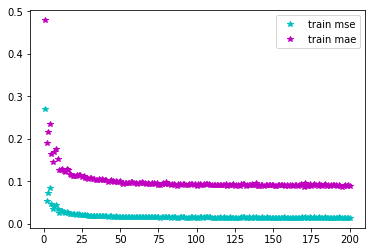

In [82]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
mae = hist.history['mean_absolute_error']
mse= hist.history['mean_squared_error']
epochs = range(1, len(loss) + 1)
plt.plot(epochs ,loss, 'c*', label='train mse')
plt.plot(epochs ,mae, 'm*', label='train mae')
plt.legend()
plt.show()

In [27]:
import math
from sklearn.preprocessing import MinMaxScaler
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8.62 RMSE
Test Score: 7.84 RMSE


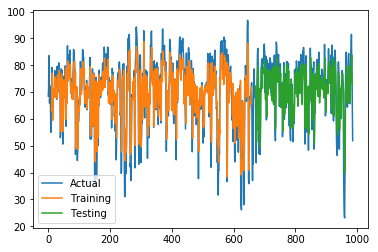

In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
plt.plot(df['avgrtob'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

# model3:

In [83]:
from keras.layers import Dense, Activation, Dropout, Bidirectional,Flatten
model = Sequential()
model.add(Bidirectional(LSTM(20, input_shape=(1, look_back))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
hist=model.fit(trainX, trainY, epochs=200, batch_size=256, verbose=2)

Epoch 1/200
 - 2s - loss: 0.2590 - mean_squared_error: 0.2590 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 73.6964 - cosine_proximity: -1.0000e+00
Epoch 2/200
 - 0s - loss: 0.2143 - mean_squared_error: 0.2143 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 66.2706 - cosine_proximity: -1.0000e+00
Epoch 3/200
 - 0s - loss: 0.1740 - mean_squared_error: 0.1740 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 59.2687 - cosine_proximity: -1.0000e+00
Epoch 4/200
 - 0s - loss: 0.1390 - mean_squared_error: 0.1390 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 53.2017 - cosine_proximity: -1.0000e+00
Epoch 5/200
 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 47.7365 - cosine_proximity: -1.0000e+00
Epoch 6/200
 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 42.6642 - cosine_proximity: -1.0000e+00
Epoc

Epoch 51/200
 - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 28.2725 - cosine_proximity: -1.0000e+00
Epoch 52/200
 - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 28.1980 - cosine_proximity: -1.0000e+00
Epoch 53/200
 - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 28.1229 - cosine_proximity: -1.0000e+00
Epoch 54/200
 - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 28.0491 - cosine_proximity: -1.0000e+00
Epoch 55/200
 - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 27.9761 - cosine_proximity: -1.0000e+00
Epoch 56/200
 - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 27.8971 - cosine_proximity: -1.0000e+0

 - 0s - loss: 0.0169 - mean_squared_error: 0.0169 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 24.1178 - cosine_proximity: -1.0000e+00
Epoch 101/200
 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 24.0910 - cosine_proximity: -1.0000e+00
Epoch 102/200
 - 0s - loss: 0.0167 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 24.0326 - cosine_proximity: -1.0000e+00
Epoch 103/200
 - 0s - loss: 0.0167 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 23.9583 - cosine_proximity: -1.0000e+00
Epoch 104/200
 - 0s - loss: 0.0166 - mean_squared_error: 0.0166 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 23.8820 - cosine_proximity: -1.0000e+00
Epoch 105/200
 - 0s - loss: 0.0165 - mean_squared_error: 0.0165 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 23.8107 - cosine_proximity: -1.0000e+00
Epoch 

Epoch 149/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 22.2380 - cosine_proximity: -1.0000e+00
Epoch 150/200
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 22.2354 - cosine_proximity: -1.0000e+00
Epoch 151/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 22.2244 - cosine_proximity: -1.0000e+00
Epoch 152/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 22.1923 - cosine_proximity: -1.0000e+00
Epoch 153/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 22.1655 - cosine_proximity: -1.0000e+00
Epoch 154/200
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 22.1700 - cosine_proximity: -1.0

Epoch 198/200
 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 21.7089 - cosine_proximity: -1.0000e+00
Epoch 199/200
 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 21.6592 - cosine_proximity: -1.0000e+00
Epoch 200/200
 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 21.6581 - cosine_proximity: -1.0000e+00


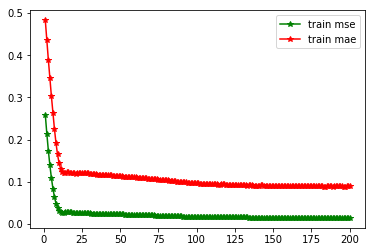

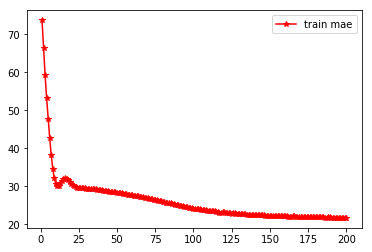

In [88]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
mae = hist.history['mean_absolute_error']
mse= hist.history['mean_squared_error']
epochs = range(1, len(loss) + 1)
plt.plot(epochs ,loss, 'g-*', label='train mse')
plt.plot(epochs ,mae, 'r-*', label='train mae')
plt.legend()
plt.show()
mape= hist.history['mean_absolute_percentage_error']
plt.plot(epochs ,mape, 'r-*', label='train mae')
plt.legend()
plt.show()

In [27]:
import math
from sklearn.preprocessing import MinMaxScaler
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.44 RMSE
Test Score: 8.59 RMSE


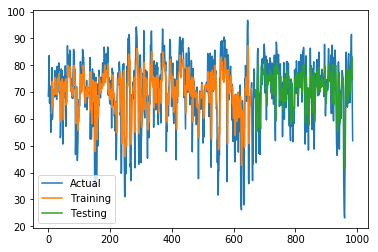

In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
plt.plot(df['avgrtob'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()